In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

from cmprs.rotations.hadamard import RandomizedHadamard, Hadamard
from cmprs.rotations.uniform import UniformRotation

D:\python3_venvs\lab\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
u_rot = UniformRotation()
rh_rot = RandomizedHadamard()
h_rot = Hadamard()

In [4]:
# draw a 2d vector on a sphere
def draw_from_2d_sphere():
    x = torch.randn([2])
    x = x / torch.linalg.vector_norm(x)
    return x

In [11]:
def draw_rotated(rotation, x):
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(3, 3)
    plt.ylim((-1.05, 1.05))
    plt.xlim((-1.05, 1.05))
    plt.plot([-1, 1], [-1, 1], 'k:')
    plt.plot([-1, 1], [1, -1], 'k:')
    ax.add_patch(plt.Circle((0, 0), 1, color='k', fill=False))
    plt.plot(0, 0, 'ko')
    for _ in range(100):
        rot_x = rotation.forward(x).tx
        plt.plot(*rot_x, 'bo')
    plt.plot(*x, 'ro')

In [12]:
import torch
import math

x = torch.tensor((math.sqrt(1 / 2), math.sqrt(1 / 2)), dtype=torch.float32)  #draw_from_2d_sphere()

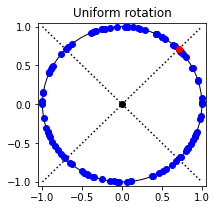

In [13]:
draw_rotated(u_rot, x)
plt.title('Uniform rotation');

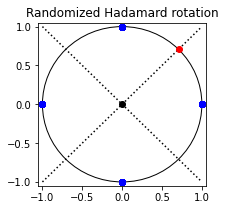

In [14]:
draw_rotated(rh_rot, torch.tensor((math.sqrt(1 / 2), math.sqrt(1 / 2)), dtype=torch.float32))
plt.title('Randomized Hadamard rotation');

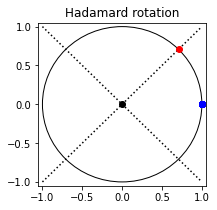

In [15]:
draw_rotated(h_rot, x)
plt.title('Hadamard rotation');

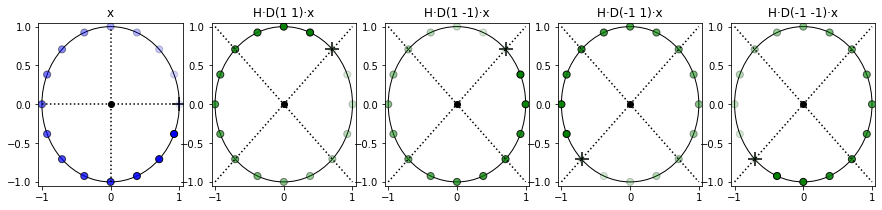

In [17]:
phis = np.arange(0, 2 * np.pi, np.pi / 8)
alphas = np.linspace(0.1, 1, phis.size)
fig, ax = plt.subplots(1, 5)
fig.set_size_inches(15, 3)
for a in ax:
    a.set_ylim((-1.05, 1.05))
    a.set_xlim((-1.05, 1.05))
    a.add_patch(plt.Circle((0, 0), 1, color='k', fill=False))
    a.plot(0, 0, 'ko')
ax[0].plot([-1, 1], [0, 0], 'k:')
ax[0].plot([0, 0], [-1, 1], 'k:')
for a in ax[1:]:
    a.plot([-1, 1], [-1, 1], 'k:')
    a.plot([-1, 1], [1, -1], 'k:')

ax[0].scatter(1, 0, s=200, marker='+', c='k')
ax[0].scatter(np.cos(phis), np.sin(phis), s=50, c='b', edgecolors='k', alpha=alphas)
ax[0].set_title('x')

for i, (flip_x, flip_y) in enumerate(product([1, -1], [1, -1]), start=1):
    rot_x = list(zip(*[h_rot.forward(torch.tensor((flip_x * np.cos(_), flip_y * np.sin(_)))).tx for _ in phis]))
    ax[i].scatter(rot_x[0][0], rot_x[1][0], s=200, marker='+', c='k')
    ax[i].scatter(*rot_x, s=50, c='g', edgecolors='k', alpha=alphas)
    ax[i].set_title(f'H·D({flip_x} {flip_y})·x')